Text(0, 0.5, 'feature_2')

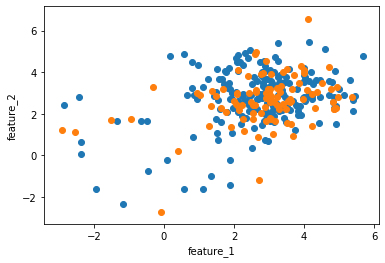

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from pyod.models.knn import KNN
from pyod.utils.data import generate_data
%matplotlib inline
outlier_fraction = 0.1  
n_train = 200 
n_test = 100
X_train, y_train, X_test, y_test = generate_data(n_train=n_train, n_test=n_test, contamination=outlier_fraction)
#let's plot our train and test set
feature_1_train = X_train[:,[0]].reshape(-1,1)
feature_2_train = X_train[:,[1]].reshape(-1,1)
feature_1_test = X_test[:,[0]].reshape(-1,1)
feature_2_test = X_test[:,[1]].reshape(-1,1)
# scatter plot 
plt.scatter(feature_1_train,feature_2_train)
plt.scatter(feature_1_test,feature_2_test)
plt.xlabel('feature_1')
plt.ylabel('feature_2')

In [3]:
knn=KNN(contamination=outlier_fraction)
knn.fit(X_train)
# get the prediction labels and outlier scores of the training data
y_train_pred = knn.labels_  
y_train_scores = knn.decision_scores_ 
# get the prediction on the test data
y_test_pred = knn.predict(X_test)  
y_test_scores = knn.decision_function(X_test)
# no of errors in test set
n_errors = (y_test_pred != y_test).sum()
print('No of Errors in test set: {}'.format(n_errors))
#accuracy in test set
print('Accuracy in test set: {}'.format((n_test-n_errors)/n_test))

No of Errors in test set: 5
Accuracy in test set: 0.95


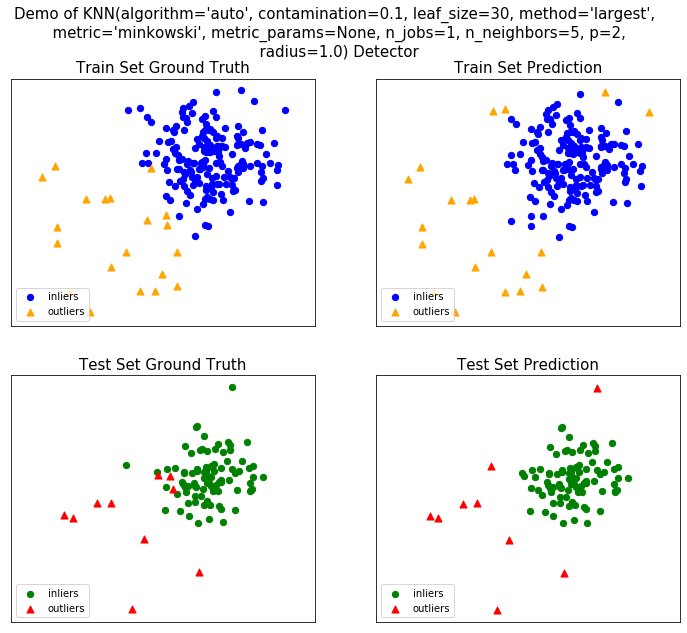

In [4]:
from pyod.utils import example
example.visualize(knn, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 18)